# Importing libraries

We start importing everything that we need

In [1]:
#All the libraries that we will use for data transformation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from scipy.stats import percentileofscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

# Reading

Read CSV

In [3]:
#Import raw data so as not to modify it
raw_df = pd.read_csv("assets/train.csv")

# EDA

View some statistics about our raw data

In [4]:
#View raw data info
raw_df.info()
raw_df.describe()
raw_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13765201 entries, 0 to 13765200
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   minutes_past           int64  
 2   radardist_km           float64
 3   Ref                    float64
 4   Ref_5x5_10th           float64
 5   Ref_5x5_50th           float64
 6   Ref_5x5_90th           float64
 7   RefComposite           float64
 8   RefComposite_5x5_10th  float64
 9   RefComposite_5x5_50th  float64
 10  RefComposite_5x5_90th  float64
 11  RhoHV                  float64
 12  RhoHV_5x5_10th         float64
 13  RhoHV_5x5_50th         float64
 14  RhoHV_5x5_90th         float64
 15  Zdr                    float64
 16  Zdr_5x5_10th           float64
 17  Zdr_5x5_50th           float64
 18  Zdr_5x5_90th           float64
 19  Kdp                    float64
 20  Kdp_5x5_10th           float64
 21  Kdp_5x5_50th           float64
 22  Kdp_5x5_90th    

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


#Data Transform

Here we start to transform the data, grouping by ID and filling NaN

In [5]:
# Data Transform
transformed_df = raw_df.groupby('Id').mean()
transformed_df = transformed_df.fillna(0)

In [6]:
#View transformed data and stats
transformed_df.describe()
transformed_df['Expected'].describe()
transformed_df.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,8.500000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


# Visualizing

See outliers

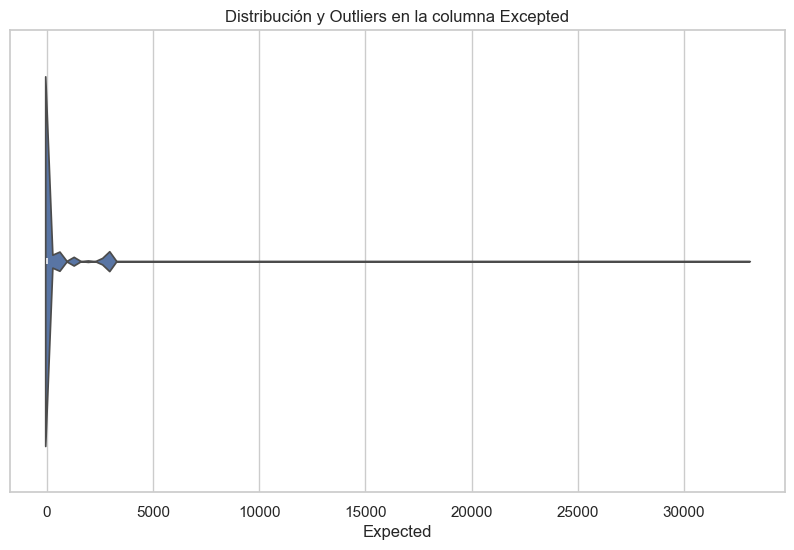

In [7]:
#Violinplot to check outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_df['Expected'])
plt.title('Distribución y Outliers en la columna Excepted')
plt.xlabel('Expected')
plt.show()

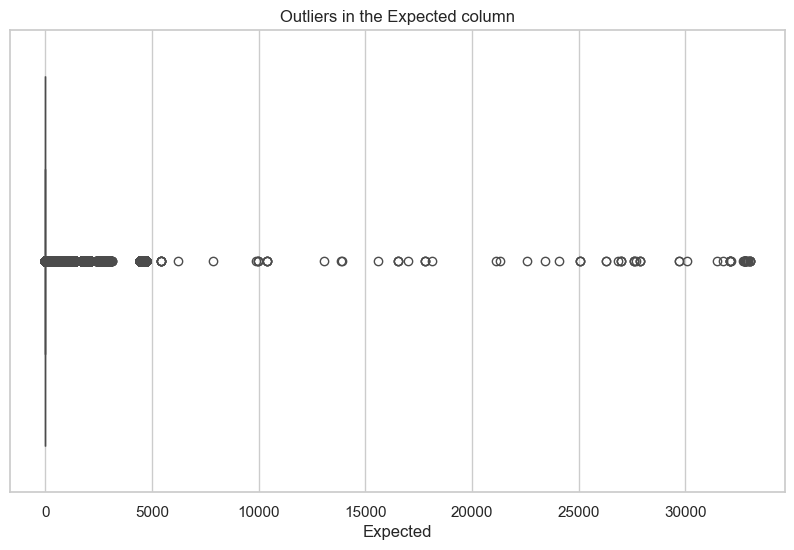

In [8]:
#Boxplot to see outliers distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_df['Expected'])
plt.title('Outliers in the Expected column')
plt.xlabel('Expected')
plt.show()
#transformed_df.info()

# Eliminate outliers

In [9]:
#Create a lower limit and an upper limit with the standard deviation, we consider outlier numbers outside 3 standard deviations.
mean = transformed_df['Expected'].mean()
std = transformed_df['Expected'].std()
num_std_dev = 3
lower_bound = mean - num_std_dev * std
upper_bound = mean + num_std_dev * std
cleaned_df = transformed_df[(transformed_df['Expected'] >= lower_bound) & (transformed_df['Expected'] <= upper_bound)]
print("Number of records after eliminating outliers:", len(cleaned_df))

Number of records after eliminating outliers: 1143831


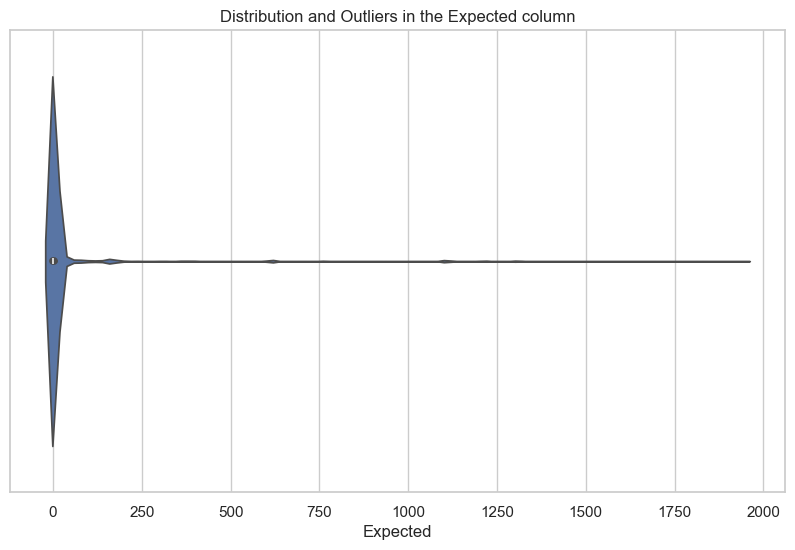

<class 'pandas.core.frame.DataFrame'>
Index: 1143831 entries, 1 to 1180945
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   minutes_past           1143831 non-null  float64
 1   radardist_km           1143831 non-null  float64
 2   Ref                    1143831 non-null  float64
 3   Ref_5x5_10th           1143831 non-null  float64
 4   Ref_5x5_50th           1143831 non-null  float64
 5   Ref_5x5_90th           1143831 non-null  float64
 6   RefComposite           1143831 non-null  float64
 7   RefComposite_5x5_10th  1143831 non-null  float64
 8   RefComposite_5x5_50th  1143831 non-null  float64
 9   RefComposite_5x5_90th  1143831 non-null  float64
 10  RhoHV                  1143831 non-null  float64
 11  RhoHV_5x5_10th         1143831 non-null  float64
 12  RhoHV_5x5_50th         1143831 non-null  float64
 13  RhoHV_5x5_90th         1143831 non-null  float64
 14  Zdr                    

In [10]:
#Violinplot without outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=cleaned_df['Expected'])
plt.title('Distribution and Outliers in the Expected column')
plt.xlabel('Expected')
plt.show()
cleaned_df.info()

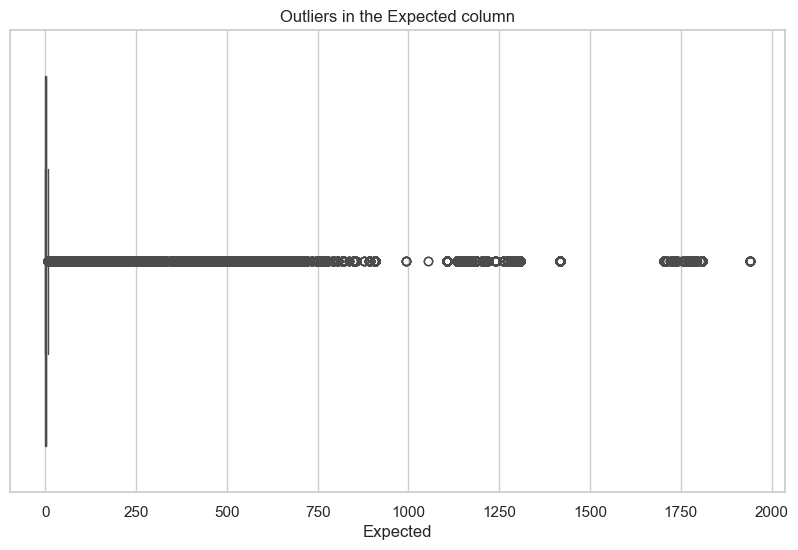

In [11]:
#Boxplot without outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_df['Expected'])
plt.title('Outliers in the Expected column')
plt.xlabel('Expected')
plt.show()

In [12]:
cleaned_df.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,8.500000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


# Save

Save our data

In [13]:
cleaned_df.to_csv('assets/cleaned_train.csv')
cleaned_df.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,8.500000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


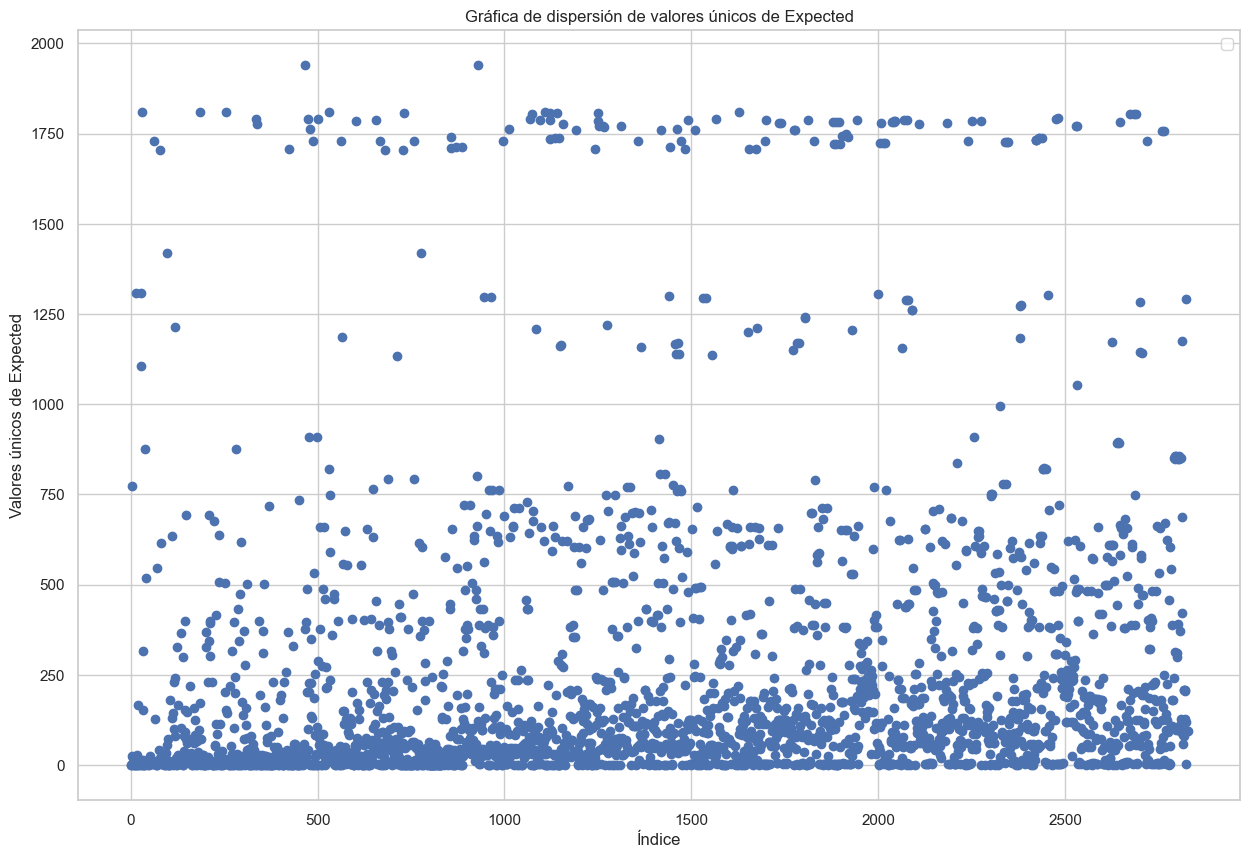

In [14]:
#genera una gráfica de dispersión que visualiza los valores únicos de la columna 'Expected' en el DataFrame cleaned_df, con los índices de estos valores en el eje x.
plt.figure(figsize=(15,10))
plt.scatter([x for x in range(len(cleaned_df['Expected'].unique()))], cleaned_df['Expected'].unique())
plt.title('Gráfica de dispersión de valores únicos de Expected')
plt.xlabel('Índice')
plt.ylabel('Valores únicos de Expected')

plt.legend()
plt.show()

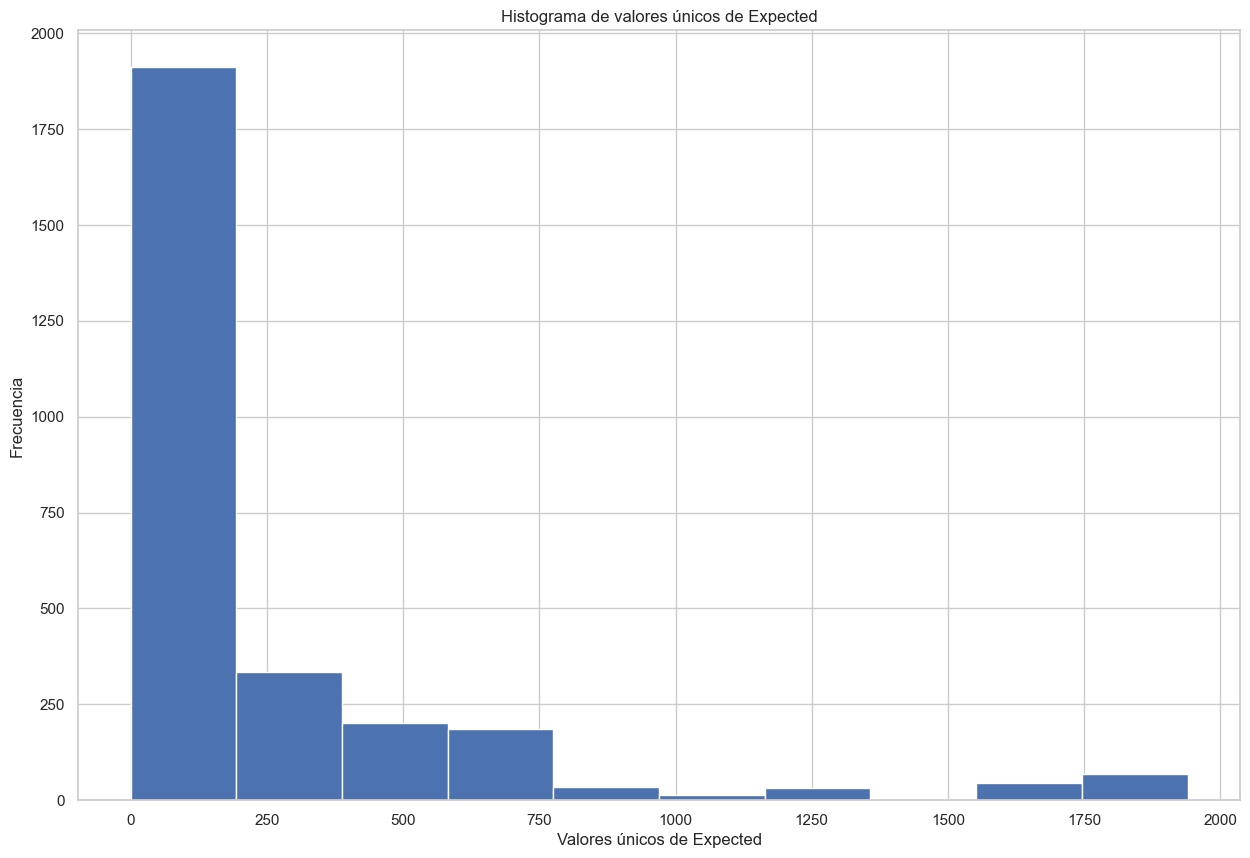

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,25.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,8.500000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,32.230769,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


In [15]:
#Genera un histograma para visualizar la distribución de los valores únicos de la columna 'Expected' en el DataFrame cleaned_df.
#Muestra las primeras cinco filas del DataFrame cleaned_df.

plt.figure(figsize=(15,10))
plt.hist(cleaned_df['Expected'].unique())
plt.title('Histograma de valores únicos de Expected')
plt.xlabel('Valores únicos de Expected')
plt.ylabel('Frecuencia')
plt.show()
cleaned_df.head()

In [28]:
#imprimirá el percentil de la media de la columna 'Expected', dándote una idea de cómo se compara este valor con los demás valores en la columna.
percentileofscore(cleaned_df['Expected'],cleaned_df['Expected'].mean())
cleaned_df.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625000,13.666667,17.375,21.333333,22.666667,20.375,22.916667,25.916667,...,1.0000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
6,29.833333,13.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
7,30.933333,13.0,14.750000,10.500000,12.500,14.428571,14.750000,11.500,14.875000,15.714286,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508000
10,27.333333,10.0,33.958333,30.291667,33.625,37.125000,34.791667,32.125,34.791667,38.000000,...,0.9875,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,0.010000


In [27]:
#elimina todas las filas del DataFrame cleaned_df donde el valor de la columna 'Expected' es mayor que la media de esa columna.
cleaned_df.drop(cleaned_df[cleaned_df['Expected'] > cleaned_df['Expected'].mean()].index,inplace=True)


C:\Users\dmigu\AppData\Local\Temp\ipykernel_11120\1320473876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[cleaned_df['Expected'] > cleaned_df['Expected'].mean()].index,inplace=True)


,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
2,29.083333,2.0,16.625000,13.666667,17.375,21.333333,22.666667,20.375,22.916667,25.916667,...,1.0000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
6,29.833333,13.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
7,30.933333,13.0,14.750000,10.500000,12.500,14.428571,14.750000,11.500,14.875000,15.714286,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508000
10,27.333333,10.0,33.958333,30.291667,33.625,37.125000,34.791667,32.125,34.791667,38.000000,...,0.9875,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,0.010000


In [17]:
#toma una muestra aleatoria de 10,000 filas de cleaned_df, muestra las dimensiones de esta muestra y luego muestra las primeras cinco filas de la muestra
df_sample = cleaned_df.sample(10000)
df_sample.shape
df_sample.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
573478,30.363636,17.0,19.250000,0.000000,18.5,23.250000,19.250000,0.000000,18.500000,23.250000,...,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.032001
400408,29.733333,4.0,3.428571,2.333333,5.7,10.100000,7.722222,6.833333,9.055556,12.678571,...,1.00375,0.635417,-0.03125,0.4,1.328125,1.059998,-1.880005,0.087494,0.915994,0.254000
10608,28.928571,10.0,0.000000,0.000000,0.0,11.000000,0.000000,0.000000,0.000000,13.166667,...,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
358274,31.000000,11.0,23.600000,21.250000,22.5,24.428571,22.650000,19.850000,22.900000,26.900000,...,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.270001
653646,27.846154,16.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
